In [29]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [30]:
# Example set size.
M = 100

# Reset pseudo random generator to a known value so that results are reproducible.
np.random.seed(42)

def true_func(M, typef):
    if(typef==0):
        return func0(M)
    else:
        return func0(M)
            
def func0(M):
    x = np.sort(6*np.random.rand(M) - 3)
    y = 0.5*x**2 + x + 2
    y_noisy = y + np.random.randn(M)
    # Create test set.
    x_test = np.linspace(-3, 3, 100).reshape(100, 1)
    y_noisy_test = 0.5*x_test**2 + x_test + 2 + np.random.randn(100, 1)
    include_bias = True
    # Polinomial degrees to be tested.
    degrees = [1, 2, 20]
    return x, y, y_noisy, x_test, y_noisy_test, include_bias, degrees

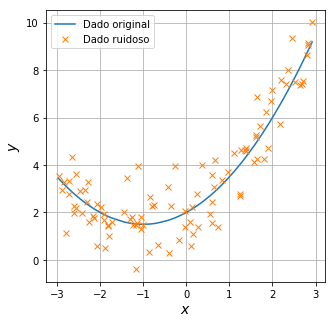

In [31]:
x, y, y_noisy, x_test, y_noisy_test, include_bias, degrees = true_func(M, 0)

# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [32]:
# Reshape arrays so that they become column vectors.
x = x.reshape(M, 1)
y_noisy = y_noisy.reshape(M, 1)

## Holdout cross-validation (80/20%)

In [33]:
# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

tamanho conjunto de treinamento: 70
tamanho conjunto de validação: 30


## k-fold cross-validation (k=10)

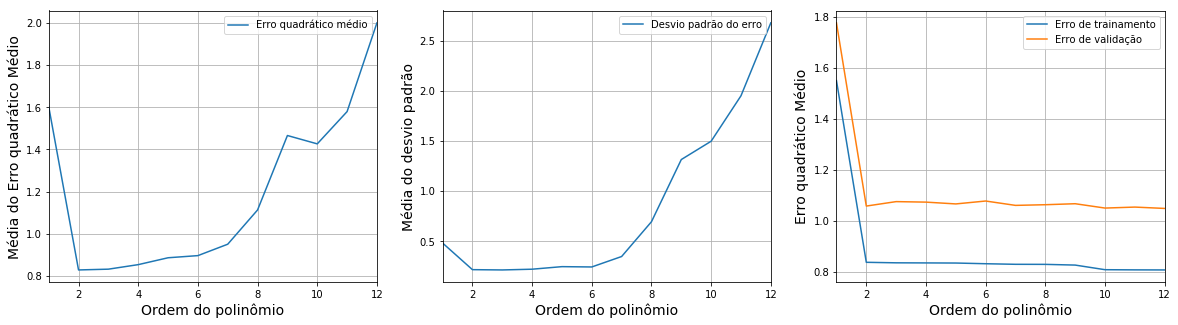

In [34]:
error_train = []
error_val = []
mean_vec = []
std_vec = []
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
    # Perform polynomial regression.
    polynomial_regression.fit(x_train, y_train)
    
    y_train_predict = polynomial_regression.predict(x_train)
    
    y_val_predict = polynomial_regression.predict(x_val) 
    
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 3, 1)
plt.plot(range(1, 13), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 2)
plt.plot(range(1, 13), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 3, 3)
plt.plot(range(1, 13), error_train, label='Erro de trainamento')
plt.plot(range(1, 13), error_val, label='Erro de validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

#Show the plot.
plt.show()